# Recurrent Neural Network Video MNIST Lab

By the end of this lab you will have

- Defined and trained a recurrent neural network with keras to perform video frame prediction with `batch_size=1`
- Defined and trained a recurrent neural network with keras to perform video frame prediction with `batch_size=100`
- Evaluated hyperparameters with a validation set
- Defined and trained a recurrent neural network with keras to perform **accurate** video frame prediction

Let's get started!

The mnist video dataset is courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data

The following code loads in the mnist video dataset and displays the first ten samples.

4


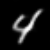

4


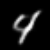

4


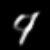

7


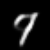

7


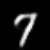

7


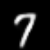

7


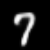

7


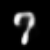

7


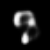

5


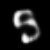

In [1]:
from IPython.display import display
import pickle

[imgs, y] = pickle.load(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:10], y[:10]):
    print(y_)
    display(img)

# Flatten Images

The following code resizes each image to `(28, 28)` and normalizes the pixel intensities and converts `y` to a categorical representation.

In [17]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.utils.np_utils import to_categorical

imgs = [img.resize(size=[28, 28]) for img in imgs]
X = np.array([img_to_array(img).flatten() for img in imgs]) / 255.
Y = to_categorical(y)

X.shape, Y.shape

((6000, 784), (6000, 10))

In [18]:
Y[0] # one hot encoding

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

# keras RNNs with `batch_size=1`

## Question

- What shape do you need to convert `X` to to make it compatible a with `SimpleRNN(..., batch_input_shape=[1, 6000, 784])` layer?

## Hints

- This is the most quick-and-dirty way to make `X` and `Y` compatible with a keras recurrent layer

In [19]:
# You need to reshape X to be a three dimensional tensor

In [20]:
X1 = X.reshape(1,6000,784)

In [22]:
X1.shape

(1, 6000, 784)

## Question

- How about `Y`?

## Hint

- The shape for the transformed `Y` is identical to the shape for the transformed `X` but for one dimension

In [ ]:
#  each Y needs to be a row vector

In [67]:
Y1 = Y.reshape(1,6000,10)

In [68]:
Y1.shape

(1, 6000, 10)

In [69]:
Y1[0].shape

(6000, 10)

In [70]:
Y1[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

## Task

- Reshape `X` and `Y` and save them into new variables call `X1` and `Y1` respectively which satisfy the above requirement

## Task

- Define a keras RNN model compatible with `X1` and `Y1`

## Requirement

- You must specify

```python
SimpleRNN(..., return_sequences=True, batch_input_shape=[1, 6000, 784])
```

as the first layer in your architecture.

In [110]:
from keras.layers import SimpleRNN, TimeDistributed, Dense
from keras.models import Sequential

In [167]:
model = Sequential()

In [168]:
model.add(SimpleRNN(units=10, batch_input_shape=(1, 6000, 784), activation='relu', return_sequences=True))

In [169]:
model.add(TimeDistributed(Dense(units=10, activation='softmax')))

In [170]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [171]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (1, 6000, 10)             7950      
_________________________________________________________________
time_distributed_7 (TimeDist (1, 6000, 10)             110       
Total params: 8,060.0
Trainable params: 8,060
Non-trainable params: 0.0
_________________________________________________________________


## Task

- Fit your RNN model on `X1` and `Y1`

## Requirement

- Fit your model with `model.fit(..., batch_size=1, shuffle=False, epochs=50)`

In [172]:
X1.shape

(1, 6000, 784)

In [173]:
Y1.shape

(1, 6000, 10)

In [174]:
X_test = X1[:,5000:,:]

In [175]:
y_test = Y1[:,5000:,:]

In [176]:
X_train = X1[:,:5000,:]
y_train = Y1[:,:5000,:]

In [177]:
X_train .shape

(1, 5000, 784)

In [178]:
y_train.shape

(1, 5000, 10)

In [179]:
#model.fit(X_train, y_train, batch_size=1, shuffle=False, epochs = 50, validation_data=[X_test,y_test])

In [180]:
model.fit(X1,Y1,batch_size=1, shuffle=False, epochs = 50)

Epoch 1/50
1/1 [==============================] - 7s - loss: 2.4026 - acc: 0.1142
Epoch 2/50
1/1 [==============================] - 5s - loss: 2.3287 - acc: 0.1223
Epoch 3/50
1/1 [==============================] - 5s - loss: 2.3113 - acc: 0.1355
Epoch 4/50
1/1 [==============================] - 5s - loss: 2.2988 - acc: 0.1442
Epoch 5/50
1/1 [==============================] - 5s - loss: 2.2881 - acc: 0.1533
Epoch 6/50
1/1 [==============================] - 5s - loss: 2.2779 - acc: 0.1648
Epoch 7/50
1/1 [==============================] - 5s - loss: 2.2682 - acc: 0.1733
Epoch 8/50
1/1 [==============================] - 6s - loss: 2.2587 - acc: 0.1830
Epoch 9/50
1/1 [==============================] - 5s - loss: 2.2495 - acc: 0.1928
Epoch 10/50
1/1 [==============================] - 5s - loss: 2.2407 - acc: 0.1970
Epoch 11/50
1/1 [==============================] - 5s - loss: 2.2323 - acc: 0.2020
Epoch 12/50
1/1 [==============================] - 5s - loss: 2.2240 - acc: 0.2072
Epoch 13/50
1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (1, 6000, 10)             7950      
_________________________________________________________________
time_distributed_7 (TimeDist (1, 6000, 10)             110       
Total params: 8,060.0
Trainable params: 8,060
Non-trainable params: 0.0
_________________________________________________________________


## Question

- List two downsides of using `model.fit(..., batch_size=1)` as opposed to `model.fit(..., batch_size=m)` where $m > 1$.

In [ ]:
#Slow to train with batch size = 1 because you have do a fill scan of the data to update the parameters such as weights
# and biases

In [ ]:
# 

# keras RNNs with `batch_size=100`

## Question

- What shape do you need to convert `X` to to make it compatible a with `SimpleRNN(..., batch_input_shape=[100, 6000, 784])` layer?

## Constraint

- One batch must complete an entire epoch

## Hints

- A batch size of `100` means we effectively have `100` copies of our RNN each of which are being simulaneously unrolled on their respective portions of the original input sequence
- The answer will be of shape `(batch_size, timesteps, 784)`

In [ ]:
# You need to chop up X into 100 copies of the input sequence, split the input into 100 sequences

In [184]:
X1.shape

(1, 6000, 784)

In [190]:
X100 = np.array(np.split(X,100))
X100.shape

(100, 60, 784)

In [195]:
y100 = np.array(np.split(Y,100))
y100.shape

(100, 60, 10)

## Task

- Reshape `X` and `Y` and save them into new variables call `X100` and `Y100` respectively which satisfy the above requirement

## Requirements

- There must be no overlap between batches (i.e. each image can only appear in a single batch

## Hint

- The simplest way to achieve this is to split `X` into `100` different chunks with `numpy.split()`

## Task

- Define a RNN model compatible with `X100` and `Y100`

## Requirement

- You must specify

```python
SimpleRNN(..., return_sequences=True, batch_input_shape=[100, 60, 784])
```

as the first layer in your architecture.

In [228]:
model100 = Sequential()

In [229]:
model100.add(SimpleRNN(12,activation='relu', batch_input_shape=(100,60,784),return_sequences=True))

In [230]:
model100.add(TimeDistributed(Dense(10,activation='softmax')))

In [231]:
model100.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [232]:
model100.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_21 (SimpleRNN)    (100, 60, 12)             9564      
_________________________________________________________________
time_distributed_16 (TimeDis (100, 60, 10)             130       
Total params: 9,694.0
Trainable params: 9,694
Non-trainable params: 0.0
_________________________________________________________________


## Task

- Fit Your RNN Model on `X100` and `Y100`

## Requirement

- Run your model for `model.fit(..., batch_size=100, epochs=50)`

In [233]:
model100.fit(X100,y100,batch_size=100,epochs=50)

Epoch 1/50
100/100 [==============================] - 1s - loss: 4.1522 - acc: 0.1052
Epoch 2/50
100/100 [==============================] - 0s - loss: 2.9172 - acc: 0.1095
Epoch 3/50
100/100 [==============================] - 0s - loss: 2.5097 - acc: 0.1025
Epoch 4/50
100/100 [==============================] - 0s - loss: 2.3837 - acc: 0.1145
Epoch 5/50
100/100 [==============================] - 0s - loss: 2.3310 - acc: 0.1302
Epoch 6/50
100/100 [==============================] - 0s - loss: 2.3049 - acc: 0.1315
Epoch 7/50
100/100 [==============================] - 0s - loss: 2.2902 - acc: 0.1265
Epoch 8/50
100/100 [==============================] - 0s - loss: 2.2799 - acc: 0.1297
Epoch 9/50
100/100 [==============================] - 0s - loss: 2.2715 - acc: 0.1295
Epoch 10/50
100/100 [==============================] - 0s - loss: 2.2639 - acc: 0.1243
Epoch 11/50
100/100 [==============================] - 0s - loss: 2.2570 - acc: 0.1237
Epoch 12/50
100/100 [==============================]

## Question

- Describe the differences you see when optimizing on `(X100, Y100)` as opposed to `(X1, Y1)`.

In [234]:
# splitting up the sequence data into segments allows for faster optimization 
# In addition, you have higher accuracy when you train RNNs in parallel  on the sequence data

## Task

- Split up `X100` and `Y100` into variables `(X_train50, Y_train50)` and `(X_val50, Y_val50)` and re-fit your model with this validation data

## Hints

- `X_train50` and `Y_train50` have shape `(50, 60, 784)` and `(50, 60, 10)` respectively. Their validation counterparts follow similarly.

In [235]:
X_train50, X_val50 = np.split(X100,2)

In [236]:
y_train50, y_val50 = np.split(y100,2)

In [237]:
X_train50.shape

(50, 60, 784)

In [245]:
model100 = Sequential()
model100.add(SimpleRNN(28,activation='relu',batch_input_shape=(50,60,784),return_sequences=True))
model100.add(TimeDistributed(Dense(10,activation='softmax')))
model100.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model100.fit(X_train50,y_train50, batch_size=50,epochs=50,validation_data=[X_val50,y_val50])

Train on 50 samples, validate on 50 samples
Epoch 1/50
50/50 [==============================] - 1s - loss: 2.3666 - acc: 0.1127 - val_loss: 2.2832 - val_acc: 0.1507
Epoch 2/50
50/50 [==============================] - 0s - loss: 2.2919 - acc: 0.1313 - val_loss: 2.2436 - val_acc: 0.1750
Epoch 3/50
50/50 [==============================] - 0s - loss: 2.2429 - acc: 0.1613 - val_loss: 2.2103 - val_acc: 0.2003
Epoch 4/50
50/50 [==============================] - 0s - loss: 2.2047 - acc: 0.1740 - val_loss: 2.1771 - val_acc: 0.2177
Epoch 5/50
50/50 [==============================] - 0s - loss: 2.1705 - acc: 0.2007 - val_loss: 2.1429 - val_acc: 0.2393
Epoch 6/50
50/50 [==============================] - 0s - loss: 2.1365 - acc: 0.2247 - val_loss: 2.1080 - val_acc: 0.2630
Epoch 7/50
50/50 [==============================] - 0s - loss: 2.1024 - acc: 0.2507 - val_loss: 2.0721 - val_acc: 0.2913
Epoch 8/50
50/50 [==============================] - 0s - loss: 2.0678 - acc: 0.2707 - val_loss: 2.0362 - val_

## Task

- Modify your keras model to make it compatible with `(X_train50, Y_train50)` and `(X_val50, Y_val50)`

## Hint

- Re-instantiate your model with `SimpleRNN(..., batch_input_shape=[50, 60, 784])`

## Question

- Why did we choose `50` for our new batch size?

In [246]:
# 50 for our batch size so that we can have multiple RNNs train at the same time. 
# Then we can combine the output gradient from each RNN to uopdate the model parameters

## Task

- Refit your model with `(X_train50, Y_train50)` and `(X_val50, Y_val50)`

## Hint

- Make sure to call `model.fit(..., batch_size=50)`

## Task

- Design and optimize a recurrent neural network to maximize validation accuracy on `(X_val50, Y_val50)`

## Hints

- Stack multiple recurrent layers
- Use a convolutional layer between the recurrent layers and the image

## Requirement

- The only recurrent layer you can use is SimpleRNN

In [272]:
from keras.layers import Conv2D, Dropout, Conv1D

In [279]:
import IPython
import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

class TrainingVisualizer(keras.callbacks.History):
    def on_epoch_end(self, epoch, logs={}):
        super().on_epoch_end(epoch, logs)
        IPython.display.clear_output(wait=True)
        pd.DataFrame({key: value for key, value in self.history.items() if key.endswith('loss')}).plot()
        axes = pd.DataFrame({key: value for key, value in self.history.items() if key.endswith('acc')}).plot()
        axes.set_ylim([0, 1])
        plt.show()



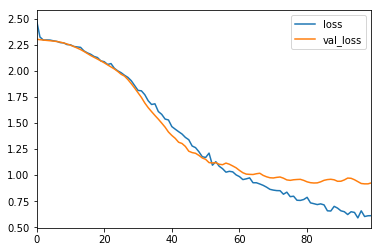

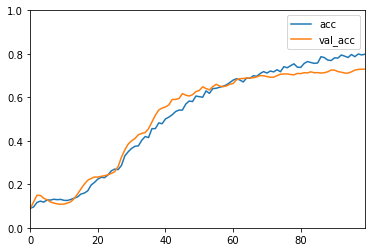

50/50 [==============================] - 2s - loss: 0.6114 - acc: 0.7983 - val_loss: 0.9257 - val_acc: 0.7297


In [286]:
modelfinal = Sequential()

modelfinal.add(SimpleRNN(128,activation='relu',batch_input_shape=(50,60,784),return_sequences=True,dropout=.3,
                         recurrent_dropout=.1))

modelfinal.add(TimeDistributed(Dense(200,activation='relu')))
modelfinal.add(Dropout(.3))
modelfinal.add(SimpleRNN(128,activation='relu',return_sequences=True,dropout=.3,recurrent_dropout=.1))
modelfinal.add(TimeDistributed(Dense(200,activation='relu')))
#modelfinal.add(TimeDistributed(Conv1D(10,2)))
modelfinal.add(Dropout(.3))
modelfinal.add(SimpleRNN(256,activation='relu',return_sequences=True,dropout=.3,recurrent_dropout=.1))
modelfinal.add(TimeDistributed(Dense(10,activation='softmax')))
modelfinal.summary()
modelfinal.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
modelfinal.fit(X_train50,y_train50, batch_size=50,epochs=100,validation_data=[X_val50,y_val50], callbacks=[TrainingVisualizer()])

# Bonus Activities

- Use more than one batch per epoch with keras stateful RNNs
- Use overlapping windows instead of disjoint windows in each batch
- Monitor gradients during training with tensorboard